In [1]:
#1 - DOWNLOAD THE DATA PROGRAMMATICLY

import kaggle

#To download via kaggle you must make an API key, and assert into a folder within your OS
#Ive done this to download programaticly via the code below
#But you cannot run it via. mybinder as you dont have the token, which is why i have included the dataset, so the assignment works :)!


kaggle.api.authenticate()
kaggle.api.dataset_download_files('russellyates88/suicide-rates-overview-1985-to-2016', path='./', unzip=True)



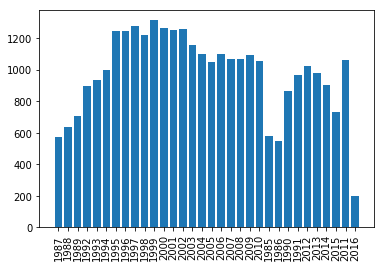

<Figure size 432x288 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#QUESTION 2 Plot amount of suicides/100k pop per year with an age group and gender of your choice

df = pd.read_csv('./master.csv')

df = df.loc[(df['age'] == '15-24 years') & (df['sex'] == 'male')]

#taking out all suicides pr 100k pop for all men in age 15-24, i added them together as the assignment
#does not specify wether to chose a singular country or to add them all together
dictMales = {}
for index, row in df.iterrows():
    if row['year'] in dictMales:
        dictMales[row['year']] += row['suicides/100k pop']
    else:    
        dictMales.setdefault(row['year'], 0.0)

#rounding all floats to nearest int for plotting purposes
for k, v in dictMales.items():
    dictMales[k] = int(round(v))
    
#Creating the plot    
D = dictMales

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation='vertical')

plt.show()
plt.subplots_adjust(bottom=0.4)

In [8]:
import sklearn.linear_model

# QUESTION 3 Make a prediction for a higher GDP per capita, and a lower GDP per capita. 
#Is there a correlation between amount of suicides per 100k pop and having a higher or lower gdp?

#Predicting wether young males between 15-24 commited more or less suicide based on their GDP_per_capita
#The below code works on any DF, i just chose to keep working with above data to keep the red line

#data frame from above
data = df

#finding the values
xs = data['suicides/100k pop']
ys = data['gdp_per_capita ($)']


#Reshape as it expects a 2d array
xs_reshape = np.array(xs).reshape(-1, 1)

#creating the model
model = sklearn.linear_model.LinearRegression()
#fitting the data
model.fit(xs_reshape, ys)


#predicted = model.predict(xs_reshape)
print(model.predict([[10]]))
print(model.predict([[50]]))
print(model.predict([[100]]))
print(model.predict([[200]]))
print(model.predict([[400]]))
print(model.predict([[600]]))
print(model.predict([[800]]))
print(model.predict([[1000]]))

#Increasingly showing that the more money you have, the less chance there should be for you to commit suicide
#Wether that holds up in court is another question, but judging by our observations within this data set
#there definiatly is a correlation between the two.


[16940.54477707]
[16223.03374661]
[15326.14495854]
[13532.3673824]
[9944.81223012]
[6357.25707784]
[2769.70192555]
[-817.85322673]


In [28]:
#NOT PARTN OF THE ASSIGNMENT
#playing around with model score, sadly it isnt correct at this point, gets a bad score always, but in theory it should work
#not sure why, hopefully we learn about this next week :D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('master.csv')

x = df['suicides/100k pop'].values.reshape(-1, 1)
y = df['gdp_per_capita ($)']
x_train, x_test, y_train, y_test = train_test_split(x, y)



model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

-0.0001313019511186564